In [1]:
import os
from tempfile import TemporaryDirectory

# Change the current working directory to a temporary directory to prevent saving files in the documentation directory.
temdir = TemporaryDirectory()
os.chdir(temdir.name)

# Interacting with the backend directly

In some advanced use cases, the {py:class}`EyeModel <visisipy.models.EyeModel>` class may not be sufficient to define the desired optical system, or a certain analysis may not be available in {py:mod}`visisipy.analysis`. 
In these cases, you can interact with the backend directly. 
Visisipy provides a few functions to make this as easy as possible:

- {py:func}`visisipy.get_backend <visisipy.backend.get_backend>`: Get a reference to the currently active backend, either {py:class}`OptilandBackend <visisipy.optiland.backend.OptilandBackend>` or {py:class}`OpticStudioBackend <visisipy.opticstudio.backend.OpticStudioBackend>`.
- {py:func}`visisipy.get_oss <visisipy.backend.get_oss>`: Get a reference to the currently active OpticStudio instance. This allows for direct interaction with OpticStudio, but only works if the OpticStudio backend is active.
- {py:func}`visisipy.get_optic <visisipy.backend.get_optic>`: Get a reference to Optilands `Optic` object. This allows for direct interaction with the optical system, but only works if the Optiland backend is active.

## Examples

:::{note}
This example uses the Optiland backend. A similar example for the OpticStudio backend can be found [here](../examples/Direct%20modification%20of%20the%20optical%20system%20in%20OpticStudio/direct_opticstudio_access.ipynb).
:::

Select the Optiland backend and get a reference to the backend object:

In [2]:
import visisipy

visisipy.set_backend("optiland")

model = visisipy.EyeModel()
model.build()

backend = visisipy.get_backend()

print(backend)

<class 'visisipy.optiland.backend.OptilandBackend'>


This reference can, for example, be used to save the model to a file:

In [3]:
backend.save_model("example_model.json")

The `Optic` object can be retrieved with {py:func}`visisipy.get_optic <visisipy.backend.get_optic>`. 
This object can be used to interact with the optical system directly, for example, to get the surface data:

In [4]:
optic = visisipy.get_optic()

optic.info()

╒════╤═══════════════╤═══════════════════════╤══════════╤═════════════╤═══════════════╤═════════╤═════════════════╕
│    │ Type          │ Comment               │   Radius │   Thickness │ Material      │   Conic │   Semi-aperture │
╞════╪═══════════════╪═══════════════════════╪══════════╪═════════════╪═══════════════╪═════════╪═════════════════╡
│  0 │ Planar        │                       │   inf    │    inf      │ Air           │  0      │      1.52788    │
│  1 │ Standard      │ cornea front          │     7.72 │      0.55   │ 1.3761, 53.05 │ -0.26   │      1.52788    │
│  2 │ Standard      │ cornea back / aqueous │     6.5  │      3.05   │ 1.3375, 48.50 │  0      │      1.49804    │
│  3 │ Stop - Planar │ pupil                 │   inf    │      0      │ 1.3375, 48.50 │  0      │      1.348      │
│  4 │ Standard      │ lens front            │    10.2  │      4      │ 1.4201, 46.38 │ -3.1316 │      1.348      │
│  5 │ Standard      │ lens back / vitreous  │    -6    │     16.3203 │ 

Because the Optiland backend is used, {py:func}`visisipy.get_oss <visisipy.backend.get_oss>` will return `None`.

In [5]:
type(visisipy.get_oss())

NoneType

The `Optic` object can also be used to run additional analyses available in Optiland, such as optical path difference map:

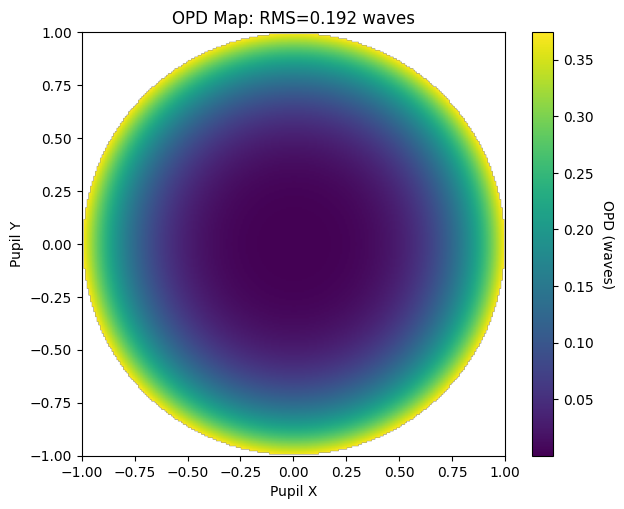

In [6]:
from optiland.wavefront import OPD

OPD(optic, field=(0, 0), wavelength=0.543).view()

## Using multiple backends simultaneously

It is also possible to use multiple backends simultaneously.
To do this, the backend classes must be imported and initialized manually.

```python
from visisipy.optiland import OptilandBackend
from visisipy.opticstudio import OpticStudioBackend

# Initialize the backends
OptilandBackend.initialize()
OpticStudioBackend.initialize()
```

To run an analysis using a specific backend, you can pass the backend as a keyword argument to the analysis function:

```python
visisipy.analysis.cardinal_points(model=model, backend=OpticStudioBackend)
```

An extensive example of using multiple backends can be found in the [](../examples/Backend%20comparison/backend_comparison.ipynb).